<img src="original_Bacchanal-Buffet-at-Caesars-Palace.jpg">

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [56]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import SnowballStemmer
from textblob import TextBlob#herşeyi düzgün yapar,düzeltir.
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import langdetect
from langdetect import detect #hangi dilde konuşulduğunu söyler.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
from PIL import Image
from csv import QUOTE_NONE

In [3]:
#pip install textblob

In [4]:
#pip install wordcloud

In [5]:
#pip install langdetect update

In [6]:
df=pd.read_csv("restaurant.csv",encoding="latin-1")

In [7]:
df.sample()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
4867,2740137,YyXH-_QIHIOjSZV6KCA-oA,RANnD8c1nvXPi5GzrG0JMw,RESDUcs7fIiihp38-d6_6g,5,1,1,1,My First ever Buffet in Vegas!\n\nWent here 2 ...,2016-06-06 18:06:21


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [9]:
df["language"]=df.text.apply(detect)
df.sample()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language
8781,3071532,JAG7x8cKFyZ0pX-GYvUpig,FzhJTA2x6Mg969Fi9LIMEw,RESDUcs7fIiihp38-d6_6g,3,1,0,1,"November, 27, 2018\n\nWe went for dinner tonig...",2019-07-02 06:15:48,en


In [10]:
df['language'].value_counts()

en    10369
es       10
da        9
pt        9
sv        8
fr        6
de        4
sw        1
sk        1
Name: language, dtype: int64

In [11]:
df.drop(df[(df['language']!="en")].index, inplace=True)

In [12]:
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive'

In [13]:
df['sentiment'].value_counts()

positive    6848
negative    1964
neutral     1557
Name: sentiment, dtype: int64

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

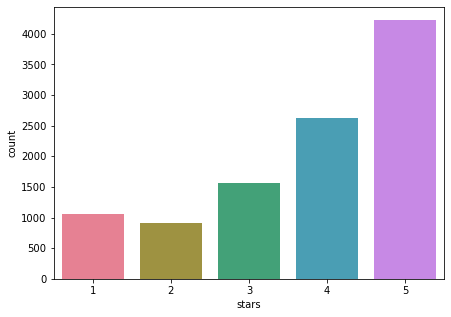

In [14]:
plt.figure(figsize = (7,5))
sns.countplot('stars', data = df, palette="husl")

<AxesSubplot:xlabel='stars', ylabel='count'>

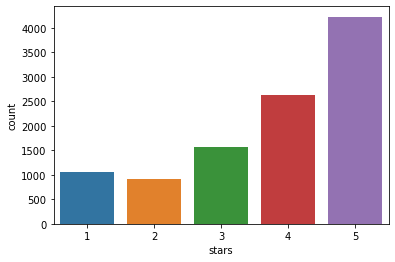

In [15]:
sns.countplot(x=df['stars'])#kaç kişi kaç yıldız vermiş gösterir.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

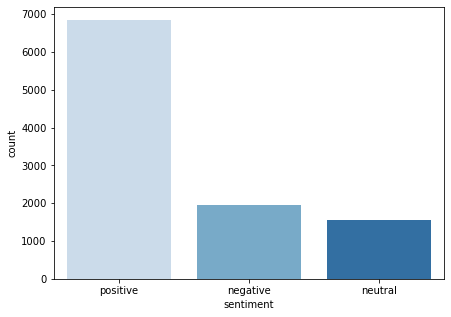

In [16]:
plt.figure(figsize = (7,5))
sns.countplot('sentiment', data = df, palette="Blues")

In [17]:
df.corr()

,Unnamed: 0,stars,useful,funny,cool
Unnamed: 0,1.000000,0.014441,0.083522,0.065616,0.072265
stars,0.014441,1.000000,0.009440,0.019928,0.049207
useful,0.083522,0.009440,1.000000,0.917178,0.947568
funny,0.065616,0.019928,0.917178,1.000000,0.946310
cool,0.072265,0.049207,0.947568,0.946310,1.000000


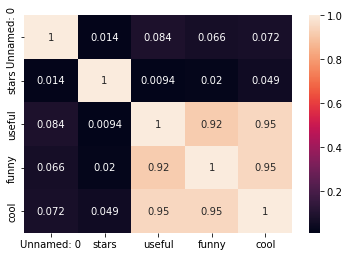

In [18]:
sns.heatmap(df.corr(),annot=True);

In [19]:
df.head(11)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,en,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,en,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,en,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,en,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,en,positive
5,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Really enjoyed everything they had to offer. I...,2015-04-01 16:18:34,en,positive
6,2370676,b7zKWOeTh_ADI6Qz6SVriQ,buCO6TON9r7V04epJxRbbg,RESDUcs7fIiihp38-d6_6g,4,0,0,0,Came for dinner at $55 per person at around 5p...,2017-03-03 18:57:13,en,positive
7,2370859,oYpcE6xvCfCI6OuhzA8Nyw,fGkOEXUPBnsloB-UrHVNLw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,Probably one the best buffet I've been to in V...,2013-04-10 16:33:52,en,positive
8,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Lots of choices. Good service. Line wasn't as ...,2017-03-27 00:42:19,en,positive
9,2371103,krKBoleiYNA9x2fC5ifHWQ,T4-Kjr4CvgYN6WRFgDB2pw,RESDUcs7fIiihp38-d6_6g,3,1,0,1,I have been craving getting down with a buffet...,2013-07-12 21:06:30,en,neutral


In [20]:
df[['text']]

,text
0,After getting food poisoning at the Palms hote...
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,The crab legs are better than the ones at Wick...
3,Not worth it! Too salty food and expensive! Th...
4,I would give this infinite stars if I could. M...
...,...
10412,"Best buffet ever! Irma was great, served us be..."
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414,The selection is amazing and all the food is e...
10415,One of the best buffets I've had in Vegas. My ...


In [21]:
df.shape

(10369, 12)

In [22]:
df.stars.value_counts()

5    4224
4    2624
3    1557
1    1051
2     913
Name: stars, dtype: int64

In [23]:
'''#NLP Projesi için yapılması gerekenler
1-herşeyi küçük harfe çevir
Merhebe,merhaba
2-Noktalama işaretlerini kaldır
3-Rakamları kaldır
4-Satır sonlarında enter'a basılmışsa kaldır (\n)
5-Gereksiz kelimeleri çıkar Stopword
6-Tokenize işlemi
7-Lemma ve Stemma(ek ve kökler)
8-Vectorizer rakama çeviriyor'''


"#NLP Projesi için yapılması gerekenler\n1-herşeyi küçük harfe çevir\nMerhebe,merhaba\n2-Noktalama işaretlerini kaldır\n3-Rakamları kaldır\n4-Satır sonlarında enter'a basılmışsa kaldır (\n)\n5-Gereksiz kelimeleri çıkar Stopword\n6-Tokenize işlemi\n7-Lemma ve Stemma(ek ve kökler)\n8-Vectorizer rakama çeviriyor"

In [24]:
df['text']=df['text'].str.lower() #büyük harfle yazılmış 10000 yorum küçük harfe çevirdi
df['text']=df['text'].str.replace('[^\W\S]','')#noktalama işaretlerini kaldırır
df['text']=df['text'].str.replace('\d+','')#rakamları kaldırır
df['text']=df['text'].str.replace('\n','')#yeni satırları kaldırır
df['text']=df['text'].str.replace('\r','')#enteri kaldırır

C:\Users\ÖZNUR\AppData\Local\Temp\ipykernel_23032\3251871456.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\W\S]','')#noktalama işaretlerini kaldırır
C:\Users\ÖZNUR\AppData\Local\Temp\ipykernel_23032\3251871456.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('\d+','')#rakamları kaldırır


In [25]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,en,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""a feast worthy of gods""baccarnal buffet in ca...",2014-01-17 00:50:50,en,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,en,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it! too salty food and expensive! th...,2016-12-19 16:15:29,en,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could. m...,2015-07-28 07:13:17,en,positive


In [26]:
df["year"]=pd.DatetimeIndex(df["date"]).year#zamanları yıla çevirir.

In [27]:
df2=pd.DataFrame(df.groupby("year").stars.mean())#verilen yıldızların ortalamasını yıllaara göre gösterir.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='stars'>

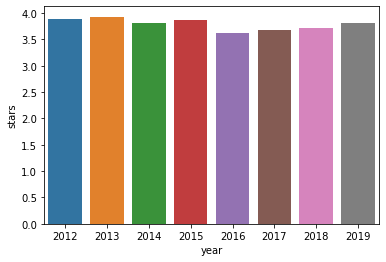

In [28]:
sns.barplot(df2.index,df2.stars)

In [29]:
df["month"]=pd.DatetimeIndex(df["date"]).month

In [30]:
df.sample()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,language,sentiment,year,month
3261,2615593,W5wcfo8kF62tgcz56CV35Q,2Bq2iYV99wRQZCWuFiZp7g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this buffet is a must for anyone wanting to ea...,2014-04-08 14:09:57,en,positive,2014,4


In [31]:
df.loc[df['stars'] ==3, 'sentiment'] ='neutral'
df.loc[df['stars'] < 3, 'sentiment'] ='negative'
df.loc[df['stars'] > 3, 'sentiment'] = 'positive'
df = df[['stars','sentiment','text']]
df.head()

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,"""a feast worthy of gods""baccarnal buffet in ca..."
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it! too salty food and expensive! th...
4,5,positive,i would give this infinite stars if i could. m...


(-1.1049109636656103,
 1.1002338709073207,
 -1.1063440179919066,
 1.1028653893677622)

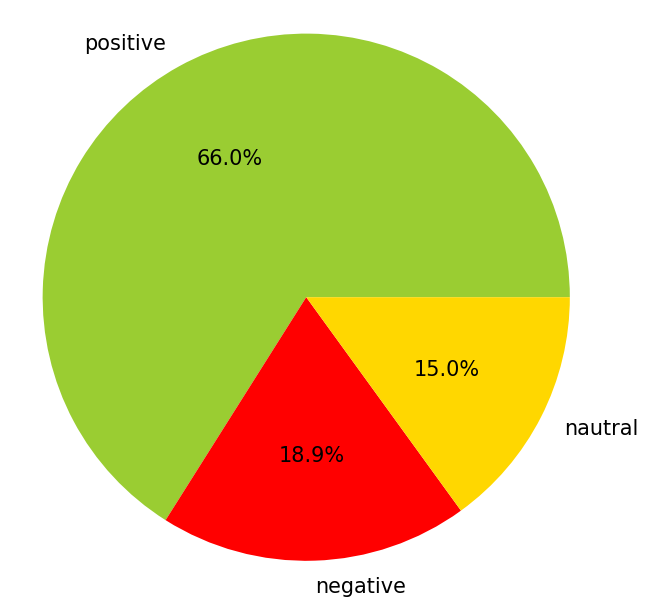

In [32]:
pie_sentiment=df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5),dpi=150),
labels='positive','negative','nautral'
colors=['yellowgreen','red','gold']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal')

In [33]:
# Commentlerin negatif mi pozitif mi olduğunu anlamak için Classification yapıyoruz.
# 1 starlar negatif, 5 ise pozitif

In [34]:
yelpbw=df[(df.stars==1)|(df.stars==5)] #yıldızı 1 ve 5 olanları ayırır.

In [35]:
yelpbw.reset_index(drop=True,inplace=True) #sıralamayı düzeltir.

In [36]:
from sklearn.linear_model import LogisticRegression #cevapları evet-hayır olanları tahmin eder.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
x=yelpbw['text']
y=yelpbw['stars']

In [38]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,1))

In [39]:
x=vect.fit_transform(x) #x'i vectöre çevirir.

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=.20)

In [41]:
x_train

<4220x13526 sparse matrix of type '<class 'numpy.int64'>'
	with 194531 stored elements in Compressed Sparse Row format>

In [42]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names())
 #vectörize ediyoruz-> kelimeleri işlem yapabileceğimiz rakamsal hale getirdik

C:\Users\ÖZNUR\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
tf.head()

,__,___,____,_________________________bacchanal,_________________________key,aa,aaa,aaaahsooo,aaaawesome,aaahhh,...,zucchini,¼if,¼â,½æ,½é,¾å,ä¹,äº,é²,ï¼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
tf.sample(5)

,__,___,____,_________________________bacchanal,_________________________key,aa,aaa,aaaahsooo,aaaawesome,aaahhh,...,zucchini,¼if,¼â,½æ,½é,¾å,ä¹,äº,é²,ï¼
1646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
l=LogisticRegression()

In [46]:
l.fit(x_train,y_train)

LogisticRegression()

In [47]:
pred=l.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(pred,y_test)

0.9554502369668246

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
m=MultinomialNB()

In [52]:
pred2=m.fit(x_train,y_train).predict(x_test) #tek satırda yazıyoruz.

In [53]:
accuracy_score(pred2,y_test)

0.9450236966824644

In [59]:
pos_text1=df.query("stars==4")['text']
pos_text2=df.query("stars==5")['text']
pos_text=pos_text1.append(pos_text2)

C:\Users\ÖZNUR\AppData\Local\Temp\ipykernel_23032\3880277019.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_text=pos_text1.append(pos_text2)


In [60]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,max_words=100,mask=mask)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

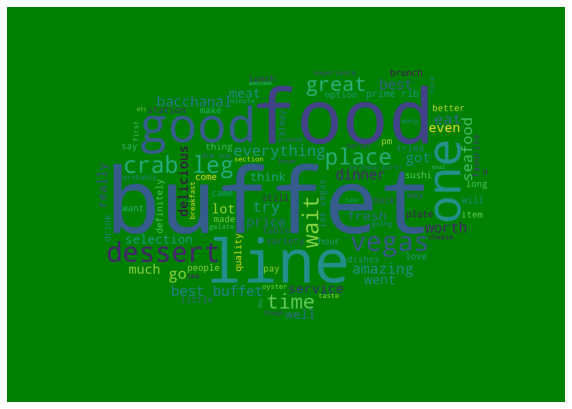

In [63]:
wc(pos_text,'green')#verilen star sayısına göre positive

In [64]:
neg_text1=df.query("stars==1")['text']
neg_text2=df.query("stars==2")['text']
neg_text=neg_text1.append(neg_text2)

C:\Users\ÖZNUR\AppData\Local\Temp\ipykernel_23032\2148574011.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neg_text=neg_text1.append(neg_text2)


In [65]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,max_words=100,mask=mask)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

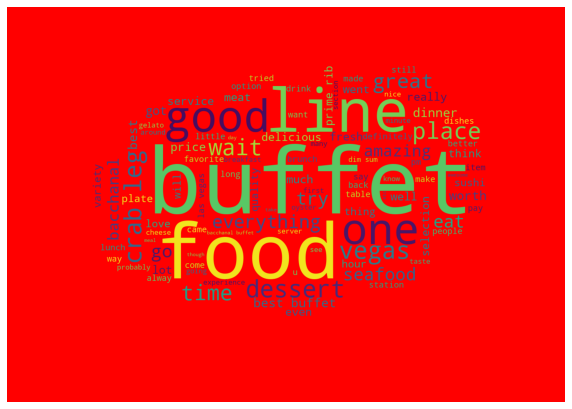

In [66]:
wc(pos_text,'red')#verilen star sayısına göre negative

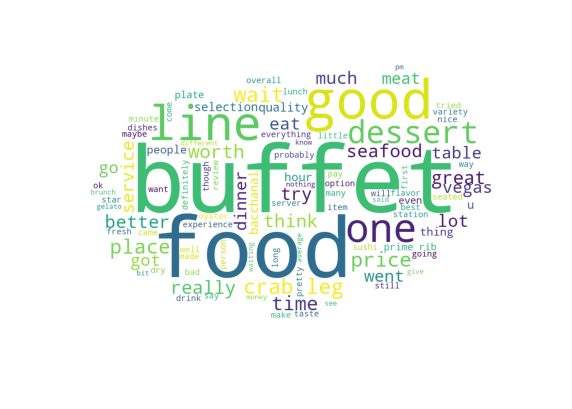

In [67]:
neut_text=df.query("stars==3")['text']
wc(neut_text,'white')#verilen star sayısına göre neutral